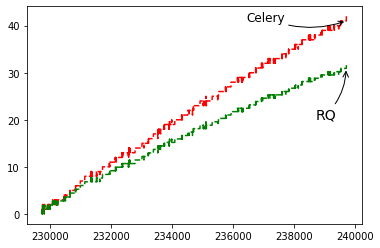

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df = pd.read_csv("c4.csv")
test=df[["id","received_at","enqueued_at"]]
#test['received_at'] = pd.to_datetime(df['received_at'], format='%Y-%m-%d %H:%M:%S')

#test['enqueued_at'] = pd.to_datetime(df['enqueued_at'], format='%Y-%m-%d %H:%M:%S')
X=test.iloc[:,0].values.reshape(-1,1)
Yr=test.iloc[:,1].values.reshape(-1,1)
Ye=test.iloc[:,2].values.reshape(-1,1)
Yrd=[]
Yed=[]
Yres=[]
Yresn=[]
for i in Yr:
    x=datetime.datetime.strptime(i[0], '%Y-%m-%d %H:%M:%S').timestamp()
    Yrd.append(x)
for i in Ye:
    x=datetime.datetime.strptime(i[0], '%Y-%m-%d %H:%M:%S').timestamp()
    Yed.append(x)
for i in range(len(Yed)):
    diff=Yrd[i]-Yed[i] 
    Yres.append(diff)
temp=[]
temp=[x**(0.924) for x in Yres]
tempr=np.array(temp)
Yresnp=np.array(Yres)
plt.plot(X,Yresnp,'r--')
plt.plot(X,tempr,'g--')
plt.annotate(r'Celery', 
             xy=(X[10],Yresnp[30]), 
             xycoords='data',
             
             xytext=(-100, 0),
             textcoords='offset points',
             fontsize=12,  
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )
plt.annotate(r'RQ', 
             xy=(X[10],tempr[30]), 
             xycoords='data',
             
             xytext=(-30, -50),
             textcoords='offset points',
             fontsize=14,  
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )
plt.show()

